<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/CEP_Linear_Regression_with_Regularizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Huge{\text{Linear Regression with Regularizers}}$

In this session, we shall learn about linear regression when we impose regularizers on the parameters. 

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers. 

In [1]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np 
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. 
The data set we will consider represents airline costs for different airline companies as a response variable dependent on multiple attributes. 


In [2]:
#Let us explore the data and the description 

#Get the data from the web 
airline_costs_data = pd.read_csv('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/airline_costs.txt', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
airline_costs_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [3]:
#if you wish to print the entire data, then use the following
airline_costs_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96
5,Central,51,134,4.67,1757,318.5,0.35,0.167,2.096,14.02,0.01,14.01
6,C&S,175,175,8.60,18000,59.2,2.17,0.558,3.889,114.16,3.11,111.05
7,Colonial,112,150,6.87,13500,77.0,1.68,0.505,3.327,35.34,0.79,34.55
8,Continental,131,179,6.50,3831,62.3,1.70,0.537,3.166,49.74,3.49,46.25
9,Delta,174,191,7.60,13119,45.3,2.74,0.598,4.582,174.32,3.87,170.45


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [4]:
import urllib.request  #this package is useful for accessing text files over internet 
drug_vs_mathscore_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/airline_costs.txt')


for line in drug_vs_mathscore_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

Dataset:  airline_costs.dat



Source: J.W. Proctor and J.S. Duncan (1954). "A Regression Analysis

of Airline Costs," Journal of Air Law and Commerce, Vol.21, #3, pp.282-292.



Description: Regression relating Operating Costs per revenue ton-mile

to 7 factors: length of flight, speed of plane, daily flight time per aircraft,

population served, ton-mile load factor, available tons per aircraft mile,

and firms net assets. Regression based on natural logarithms of all

factors, except load factor. Load factor and available tons (capacity)

for Northeast Airlines was imputed from summary calculations.



Variables/columns

Airline   1-20

Length of flight (miles)  22-28

Speed of Plane (miles per hour)  30-36

Daily Flight Time per plane (hours)  38-44

Population served (1000s)   46-52

Total Operating Cost (cents per revenue ton-mile)  54-60

Revenue Tons per Aircraft mile   62-68

Ton-Mile load factor (proportion)  70-76

Available Capacity (Tons per mile)  78-84

Total Assets  ($1

Having known the data description, let us insert the descriptions into the data now.

In [5]:
airline_costs_data.columns = ['Airline', 'Flight Length', 'Plane Speed','Daily flight time per plane', 'Population Served','TOC','Revenue','Load Factor','Capacity','Total Assets','Funds','Adjusted Assets']


#check by printing the data again
airline_costs_data.head()

,Airline,Flight Length,Plane Speed,Daily flight time per plane,Population Served,TOC,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


Let us move the TOC column as the second column, just after the Airline company name. 

In [6]:
# shift column 'TOC' to second position
TOC_column = airline_costs_data.pop('TOC') #collect the contents of TOC  column into a temporary object 
  
# insert column into the dataframe using insert(position,column_name,
# column_contents) function
airline_costs_data.insert(1, 'TOC', TOC_column) #Insert as second column, so position is 1
  
print("After shifting TOC column to second position")
airline_costs_data.head()

After shifting TOC column to second position


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,21.13,3.21,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,195.02,6.06,188.96


Also note that Adjusted Assets column is sufficient for our analysis, since if is obtained as difference of Total Assets and Funds. However for this exercise, we shall $\textbf{not}$ remove Total Assets and Funds columns. Instead, we will keep them. 

$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$ 

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

$\Large{\text{Solving the OLS optimization problem}}:$

Assuming the responses $y^1,y^2,\ldots,y^n$ are present in a $n \times 1$ matrix represented as:

$
\mathbf{y}=\begin{bmatrix}
y^1 \\ y^2 \\ \vdots \\ y^n
\end{bmatrix}
$

and the predictor variables $\mathbf{x}^1,\mathbf{x}^2,\ldots,\mathbf{x}^d$ are placed in a $n\times (d+1)$ matrix represented as:

$
\mathbf{X}=\begin{bmatrix}
\leftarrow & \mathbf{x}^1 & \rightarrow & 1 \\
\leftarrow & \mathbf{x}^2 & \rightarrow & 1 \\
\leftarrow & \ldots & \rightarrow & 1  \\
\leftarrow & \mathbf{x}^n & \rightarrow & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
{x}_1^1 & {x}_2^1 &\ldots & {x}_d^1 & 1 \\
{x}_1^2 & {x}_2^2 &\ldots & {x}_d^2 & 1 \\
\vdots & \vdots & \ldots & \vdots \\
{x}_1^n & {x}_2^n &\ldots & {x}_d^n & 1 
\end{bmatrix}
$
where note that the last column of matrix $\mathbf{X}$ contains a column of all ones. This column is useful to incorporate the effect of $\beta_0$ parameter in $\mathbf{X}$ matrix. 

Similarly assume that 
 we can write the coefficients $\beta_0,\beta_1,\ldots,\beta_d$ as a $(d+1)\times 1$ matrix represented as:

$
\mathbf{\beta} = \begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}.
$

Now we can write the objective function as:

$
L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2.
$

To solve 

$
\min_\beta L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is valid only when $(\mathbf{X}^\top\mathbf{X})^{-1}$ is invertible. Otherwise we need to solve the system given by:

$
\mathbf{X}^\top\mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
$
using a solver. 



$\Large{\text{Computing } \beta \text{ for the airline costs data set}}:$

In [7]:
#Let us now compute beta 
n = len(airline_costs_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 31


In [8]:
#extract the predictor variable columns 
cols = [2,3,4,5,6,7,8,9, 10, 11]
X_data = airline_costs_data[airline_costs_data.columns[cols]]

X_data

,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,57,133,6.10,20200,0.96,0.400,2.400,21.13,3.21,17.92
1,270,216,6.93,56928,3.98,0.689,5.776,1436.53,165.22,1271.31
2,100,140,4.45,183,0.79,0.358,2.207,6.65,0.01,6.64
3,176,182,6.60,11869,2.57,0.557,4.614,160.30,5.81,154.49
4,142,167,7.47,41097,2.68,0.510,5.255,195.02,6.06,188.96
5,51,134,4.67,1757,0.35,0.167,2.096,14.02,0.01,14.01
6,175,175,8.60,18000,2.17,0.558,3.889,114.16,3.11,111.05
7,112,150,6.87,13500,1.68,0.505,3.327,35.34,0.79,34.55
8,131,179,6.50,3831,1.70,0.537,3.166,49.74,3.49,46.25
9,174,191,7.60,13119,2.74,0.598,4.582,174.32,3.87,170.45


In [9]:
#convert predictor variable columns into a numpy array

X_array = airline_costs_data[airline_costs_data.columns[cols]].to_numpy()
X_array

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 2.11300e+01, 3.21000e+00, 1.79200e+01],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.43653e+03, 1.65220e+02, 1.27131e+03],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.65000e+00, 1.00000e-02, 6.64000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.60300e+02, 5.81000e+00, 1.54490e+02],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.95020e+02, 6.06000e+00, 1.88960e+02],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40200e+01, 1.00000e-02, 1.40100e+01],
       [1.75000e+02, 1.75000e+02, 8.60000e+00, 1.80000e+04, 2.17000e+00,
        5.58000e-01, 3.88900e+00, 1.14160e+02

In [10]:
import numpy as np
#add a column of ones to X_array
X = np.hstack((X_array, np.ones((X_array.shape[0], 1), dtype=X_array.dtype)))

X

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 2.11300e+01, 3.21000e+00, 1.79200e+01,
        1.00000e+00],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.43653e+03, 1.65220e+02, 1.27131e+03,
        1.00000e+00],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.65000e+00, 1.00000e-02, 6.64000e+00,
        1.00000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.60300e+02, 5.81000e+00, 1.54490e+02,
        1.00000e+00],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.95020e+02, 6.06000e+00, 1.88960e+02,
        1.00000e+00],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40200e+01, 1.00000e-02, 1.40100e+01,
        1.0000

In [11]:
#convert predictor variable columns into a numpy array

response_cols = [1]
y = airline_costs_data[airline_costs_data.columns[response_cols]].to_numpy()
y


array([[116.3],
       [ 43. ],
       [141.5],
       [ 50.6],
       [ 51. ],
       [318.5],
       [ 59.2],
       [ 77. ],
       [ 62.3],
       [ 45.3],
       [ 42.6],
       [112.4],
       [125.2],
       [169.3],
       [ 64.8],
       [100.5],
       [ 42.9],
       [ 81.1],
       [ 56.7],
       [ 75.4],
       [ 71.3],
       [150.1],
       [ 78.9],
       [130.3],
       [ 46.2],
       [ 42.3],
       [103.3],
       [ 44.2],
       [ 64.7],
       [820.9],
       [130.9]])

In [12]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X),X)
print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X),y)
#print('Xy shape:',Xy.shape)

#solving a system of linear equations Ax=b, can be done using np.linalg.solve(A,b)

beta =np.linalg.solve(XTX,Xy)
#beta = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta)



XTX shape: (11, 11)
beta [[ 7.52395660e-01]
 [-2.25317845e+00]
 [ 3.31746733e+00]
 [ 3.10628655e-03]
 [ 7.23197186e+02]
 [-2.17522853e+03]
 [-3.82138951e+02]
 [ 1.74533242e+01]
 [-1.60157778e+01]
 [-1.79765303e+01]
 [ 1.43301982e+03]]


In [13]:
print(np.linalg.matrix_rank(XTX))
XTX_inv = np.linalg.inv(XTX)

#print(np.matmul(XTX,XTX_inv))
is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

10
False


$\textbf{Note:}$ Though the matrix $X^\top X$ is not full-rank, that is, $10:= \text{rank}(X^\top X)<11$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. Hence we will use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error. 

In [14]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X),X)
#print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X),y)
#print('Xy shape:',Xy.shape)

beta =scipy.linalg.solve(XTX,Xy)
#beta = np.matmul(scipy.linalg.inv(XTX),Xy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: LinAlgWarning: Ill-conditioned matrix (rcond=7.39613e-21): result may not be accurate.
  # This is added back by InteractiveShellApp.init_path()


$\textbf{Note:}$ $\texttt{scipy}$ gives a warning that the matrix $X^\top X$ is ill-conditioned. 

We can use the condition number of a matrix $A$ to identify if the matrix is ill-conditioned or not. 

Suppose we solve a system $Ax=b$, then the condition number of $A$ denotes the amount of error that can be incurred in the decision variable $x$ when there is a small error in $b$. 

For a symmetric matrix $A$, we can compute the condition number of $A$ denoted by $\kappa(A)$ as:

$\begin{align}
\kappa(A) = \frac{|\lambda_{\max}(A)|}{|\lambda_{\min}(A)|}
\end{align}
$

where $\lambda_{\max}(A)$ and $\lambda_{\min}(A)$ denote respectively the maximum and minimum eigen values of $A$ and $|z|$ denotes the absolute value of a real number $z$.

If the condition number $\kappa(A)$ is a $\textbf{large number}$ then the error incurred in $x$ would be large and hence the matrix $A$ is called $\textbf{ill-conditioned}$.  


Let us compute the condition number of $X^\top X$.

In [15]:
#condition number of XTX
print(np.linalg.cond(XTX))

2.4610368283570592e+20


$\textbf{Adding $\ell_2$ regularizer to improve the conditioning of the matrix}$: 

We shall motivate the use of $\ell_2$ regularizer to improve the conditioning of the matrix. 

Instead of minimizing the original OLS objective 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

we shall now minimize the OLS objective added with a scaled $\ell_2$ regularizer. 

The $\ell_2$ regularizer in $\beta \in {\mathbb{R}}^{d+1}$ is defined as the squared $\ell_2$ norm of $\beta$: 

$
\begin{align}
\|\beta\|_2^2 = \sum_{i=1}^{d+1} \beta_i^2.  
\end{align}
$

Hence we shall now solve: 
$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

The above objective function is called $\textbf{ridge}$ regression objective. $\lambda>0$ is a regularization hyperparameter. 



Now we can write the objective function as:

$
L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2.
$

To solve 

$
\min_\beta L_{\text{ridge}}(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2 + \lambda \|\beta\|_2^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L_{\text{ridge}}(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta + \lambda I\beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X}+\lambda I)^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is always valid since $(\mathbf{X}^\top\mathbf{X}+\lambda I)$ is invertible.  


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [16]:
lambdas = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 1e-05 cond(XTX+lambda I): 1501310292340303.5
lambda: 0.0001 cond(XTX+lambda I): 150126912538287.34
lambda: 0.001 cond(XTX+lambda I): 15012672255523.154
lambda: 0.01 cond(XTX+lambda I): 1501267250531.3953
lambda: 0.1 cond(XTX+lambda I): 150126721553.5753
lambda: 1.0 cond(XTX+lambda I): 15012672102.428282
lambda: 10.0 cond(XTX+lambda I): 1501267211.0623977
lambda: 100.0 cond(XTX+lambda I): 150126722.00526762


With $\lambda \in \{10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100\}$ , let us now solve for $\beta$ and check the solutions.

In [17]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

betas = [] 
for lambda_ in lambdas:
  beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
  print('lambda:',lambda_)
  print('beta:',beta)
  print('***************')
  betas.append(beta)

lambda: 1e-05
beta: [[ 7.52538381e-01]
 [-2.25222818e+00]
 [ 3.30238546e+00]
 [ 3.10642807e-03]
 [ 7.22976204e+02]
 [-2.17465207e+03]
 [-3.82040729e+02]
 [ 3.04818986e-01]
 [ 1.13266371e+00]
 [-8.27966389e-01]
 [ 1.43271639e+03]]
***************
lambda: 0.0001
beta: [[ 7.53818742e-01]
 [-2.24369420e+00]
 [ 3.16700342e+00]
 [ 3.10769932e-03]
 [ 7.20992498e+02]
 [-2.16947737e+03]
 [-3.81159028e+02]
 [ 3.04758743e-01]
 [ 1.13215169e+00]
 [-8.27378531e-01]
 [ 1.42999211e+03]]
***************
lambda: 0.001
beta: [[ 7.66223755e-01]
 [-2.16014295e+00]
 [ 1.84741577e+00]
 [ 3.12018008e-03]
 [ 7.01649939e+02]
 [-2.11902946e+03]
 [-3.72563812e+02]
 [ 3.04604230e-01]
 [ 1.12668192e+00]
 [-8.22074185e-01]
 [ 1.40339039e+03]]
***************
lambda: 0.01
beta: [[ 8.58860080e-01]
 [-1.46856675e+00]
 [-8.62792126e+00]
 [ 3.22604166e-03]
 [ 5.47573013e+02]
 [-1.71783994e+03]
 [-3.04249073e+02]
 [ 3.02345843e-01]
 [ 1.08073317e+00]
 [-7.78387362e-01]
 [ 1.18855672e+03]]
***************
lambda: 0.1
beta

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

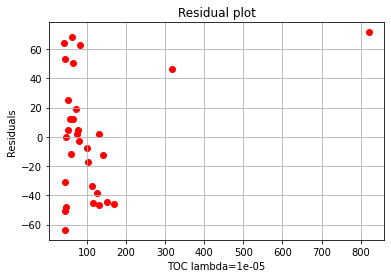

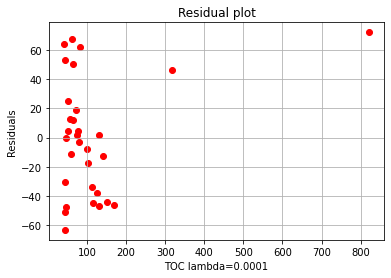

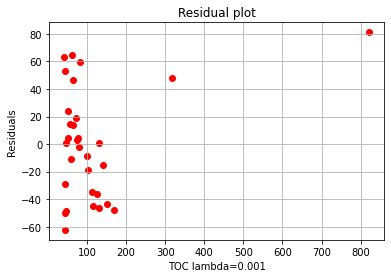

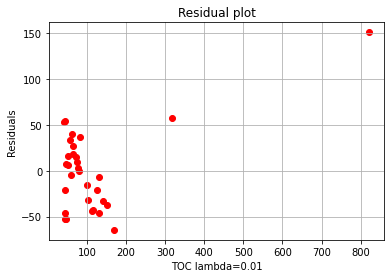

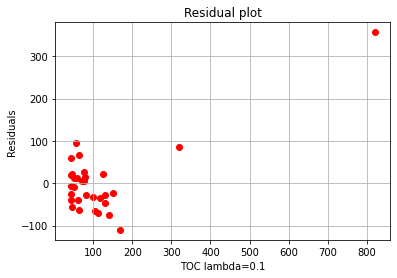

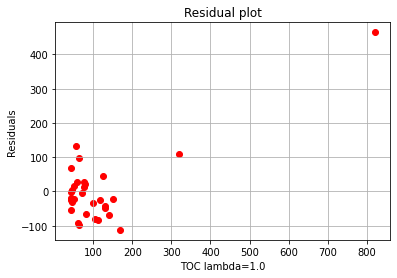

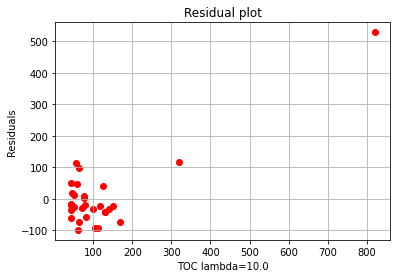

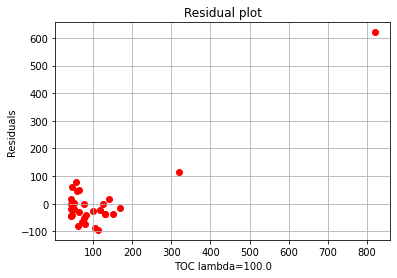

In [18]:
beta_idx = 0
for lambda_ in lambdas: 
  beta = betas[beta_idx]
  beta_idx += 1
  xlabel = 'TOC lambda='+str(lambda_)
  e_i_residuals_list = [] 

  for i in range(n): 
    x_i = X[i,:] #access i-th row of X
    y_i = y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    e_i_residuals_list.append(e_i) #append the value of e_i to the list 

  #plot the residuals e_i against the actual observations y_i
  plt.scatter(airline_costs_data['TOC'], e_i_residuals_list,color='r')
  plt.title("Residual plot")
  plt.xlabel(xlabel)
  plt.ylabel("Residuals")
  plt.grid()
  plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case. 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Let us compute $R^2$. 

In [19]:
#We shall now compute R^2 for airline costs data

#first we shall compute y_bar 
y_bar = 0
for i in range(n): #access each row from the data set 
  y_i = float(airline_costs_data.iat[i,1]) #access element at TOC column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(airline_costs_data.iat[i,1]) #access element at TOC column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals 
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx+=1
  sum_sq_residuals = 0
  for i in range(n): #access each row from the data set 
    x_i = X[i,:] #access i-th row of X
    y_i = y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals += (e_i)**2

  print('lambda:',lambda_)
  print('sum of squared residuals:', sum_sq_residuals)

  #Then we will compute the R^2 quantity
  R_sq = 1-sum_sq_residuals/sigma_yy
  print('R^2:',R_sq)
  print('*********************')

y_bar 113.50645161290323
sigma_yy: 610938.3987096774
lambda: 1e-05
sum of squared residuals: [48091.04515484]
R^2: [0.92128332]
*********************
lambda: 0.0001
sum of squared residuals: [48092.90331628]
R^2: [0.92128027]
*********************
lambda: 0.001
sum of squared residuals: [48270.38435013]
R^2: [0.92098977]
*********************
lambda: 0.01
sum of squared residuals: [60051.44363136]
R^2: [0.90170622]
*********************
lambda: 0.1
sum of squared residuals: [198507.15296848]
R^2: [0.67507828]
*********************
lambda: 1.0
sum of squared residuals: [330055.62735503]
R^2: [0.45975629]
*********************
lambda: 10.0
sum of squared residuals: [379056.04870797]
R^2: [0.37955111]
*********************
lambda: 100.0
sum of squared residuals: [463653.0991366]
R^2: [0.24108044]
*********************


$\textbf{Adding $\ell_1$ regularizer to find sparse solutions}$: 

Instead of $\ell_2$ regularizer, we can use $\ell_1$ regularizer of the parameters $\beta$. $\ell_1$ regularizer is useful to obtain sparse solutions, where most of the components of $\beta$ are zero and only a few weights are non-zero. 

The $\ell_1$ regularizer with $\beta$ is given as the $\ell_1$ norm of $\beta$:

$
\begin{align}
\|\beta\|_1 = \sum_{i=1}^{d+1} |\beta_i|.
\end{align}
$

Recall the original OLS objective: 
$
\begin{align}
L_{OLS}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

and the objective for ridge regression where we minimize the OLS objective added with a scaled $\ell_2$ regularizer: 

$
\begin{align}
L_{\text{ridge}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \lambda \sum_{i=1}^{d+1} \beta_i^2. 
\end{align}
$ 

Similar to ridge regression, we can use the scaled $\ell_1$ regularizer along with the OLS objective to get the following objective: 

$
\begin{align}
L_{\text{lasso}}(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2 + \alpha \sum_{i=1}^{d+1} |\beta_i|. 
\end{align}
$ 

The above objective function is called $\textbf{lasso}$ regression objective. $\alpha>0$ is a regularization hyperparameter. 

Unlike ridge regression, lasso cannot be solved by a simple differentiation type idea. 

Instead we need to use an iterative algorithm to solve the lasso optimization problem. 


In [24]:
from sklearn import linear_model
from sklearn.metrics import r2_score
alphas = np.array([1e-5, 1e-4, 1e-3,1e-2,0.1,1,10,100])

for alpha_ in alphas:
  clf = linear_model.Lasso(alpha=alpha_,max_iter=100000)
  clf.fit(X, y)
  print('alpha:',alpha_)
  print(clf.coef_)
  print(clf.intercept_)
  y_pred = clf.predict(X)
  R2=r2_score(y,y_pred)
  print('R2 score:',R2)
  print('************************')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.85867555970617, tolerance: 61.09383987096774
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.7560244394408, tolerance: 61.09383987096774
  positive)


alpha: 1e-05
[ 7.52401775e-01 -2.25317646e+00  3.31721242e+00  3.10628549e-03
  7.23193567e+02 -2.17521925e+03 -3.82137254e+02 -2.78886609e-01
  1.71643369e+00 -2.44318836e-01  0.00000000e+00]
[1433.01645838]
R2 score: 0.92128334639926
************************
alpha: 0.0001
[ 7.52456817e-01 -2.25315853e+00  3.31491825e+00  3.10627593e-03
  7.23160998e+02 -2.17513575e+03 -3.82121985e+02 -2.78816556e-01
  1.71636988e+00 -2.44382341e-01  0.00000000e+00]
[1432.9861773]
R2 score: 0.9212833456535767
************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239.72510696386598, tolerance: 61.09383987096774
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.0326550937971, tolerance: 61.09383987096774
  positive)


alpha: 0.001
[ 7.53007233e-01 -2.25297921e+00  3.29197652e+00  3.10618035e-03
  7.22835308e+02 -2.17430073e+03 -3.81969290e+02 -2.78116027e-01
  1.71573174e+00 -2.45017392e-01  0.00000000e+00]
[1432.68336649]
R2 score: 0.9212832710852403
************************
alpha: 0.01
[ 7.58511392e-01 -2.25118599e+00  3.06255921e+00  3.10522453e-03
  7.19578406e+02 -2.16595052e+03 -3.80442344e+02 -2.71110737e-01
  1.70935036e+00 -2.51367904e-01  0.00000000e+00]
[1429.65525834]
R2 score: 0.9212758142516358
************************
alpha: 0.1
[ 8.13552981e-01 -2.23325387e+00  7.68386149e-01  3.09566627e-03
  6.87009388e+02 -2.08244846e+03 -3.65172884e+02 -2.01057840e-01
  1.64553651e+00 -3.14873020e-01  0.00000000e+00]
[1399.37417686]
R2 score: 0.9205301308911755
************************
alpha: 1.0
[ 1.33203160e+00 -2.10277243e+00 -1.93345383e+01  2.92881337e-03
  3.71126241e+02 -1.28114129e+03 -2.17165267e+02 -0.00000000e+00
  1.43815928e+00 -4.36373247e-01  0.00000000e+00]
[1104.46533157]
R2 scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183.7711423726214, tolerance: 61.09383987096774
  positive)


$\Large{\text{Exercise:}}$

Perform ridge regression and lasso with the following data sets:
1. Data: http://users.stat.ufl.edu/~winner/data/bridge_risk.dat
   Description: http://users.stat.ufl.edu/~winner/data/bridge_risk.txt
2. Data: http://users.stat.ufl.edu/~winner/data/lpga2009.dat
   Description: http://users.stat.ufl.edu/~winner/data/lpga2009.txt
Choose $\lambda$ for ridge regression and $\alpha$ for lasso from the set $\{10^{-5},10^{-4},10^{-3},10^{-2},10^{-1},1,10,100\}$. 

Choose the best $\lambda$ and $\alpha$ based on the train set $R^2$ value. 

Report the residual plots and $R^2$ value for each data set for the best hyperparameters. Explain your observations. 


$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

